# K-Nearest Neighbors (KNN)
## Introduction

K-Nearest Neighbors (KNN) is one of the most intuitive and versatile algorithms in machine learning. It belongs to a class of **instance-based**, **non-parametric** learning methods, meaning it makes predictions by directly referencing the training data rather than learning an explicit function. While often used for classification, KNN can also be adapted for regression tasks.

At its core, KNN relies on a simple biological analogy: individuals with similar characteristics tend to behave similarly. Given a new data point, KNN examines the **k closest training examples**, measured using a distance metric like **Euclidean distance**, and assigns the majority label among those neighbors as the prediction.

The Euclidean distance between two points *a* and *b* in an *n*-dimensional feature space is given by:

\\[
d(a, b) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}
\\]

Once distances are computed, the algorithm selects the *k* smallest distances and performs a **majority vote** (for classification) or an average (for regression) using the corresponding labels.

The KNN algorithm can be described in three steps:

1. Compute the distance from the test point to all training points.
2. Identify the *k* nearest neighbors based on distance.
3. Predict the label based on the majority class among those neighbors.

Unlike linear models that aim to learn coefficients or weights, KNN performs no training. It **memorizes** the dataset and defers computation to prediction time. This makes KNN computationally light during training but potentially expensive when predicting large datasets.

KNN is sensitive to feature scaling, class imbalance, and the choice of *k*. Despite these limitations, it remains a powerful baseline and an excellent tool for visualizing decision boundaries and understanding how data is structured in space.

KNN is widely used in fields like psychology (behavioral classification), medicine (disease prediction), and recommendation systems. Its simplicity, transparency, and effectiveness make it a valuable algorithm for both teaching and application.


### Required Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns 

### Load and Preprocess the Data
The dataset used in this project comes from a publicly available collection of personality assessments. Each row represents an individual's responses to a personality test, and the features include various items that measure the Big Five personality traits.

In this project, we focus specifically on the **Openness to Experience** trait, using responses to 10 items labeled `OPN1` through `OPN10`.

To prepare the data for KNN classification:

- We randomly sample 2,000 rows from the full dataset to ensure computational efficiency while retaining diversity.
- We select only the 10 openness-related features and remove any rows with missing values.
- We compute the **mean openness score** for each participant and binarize it: participants scoring above the median are labeled as `1` (high openness), and those below or equal to the median are labeled as `0` (low openness).
- The features are standardized using `StandardScaler` to ensure that all dimensions contribute equally to the distance calculations.
- Finally, we split the dataset into training and testing subsets using an 80/20 ratio.

In [89]:
# Load dataset and sample 2,000 rows
df = pd.read_csv("Personality.csv", sep='\t')
df = df.sample(n=2000, random_state=42)

# Use only the 10 Openness items (OPN1 to OPN10)
openness_cols = [f"OPN{i}" for i in range(1, 11)]
data = df[openness_cols].dropna()

# Create binary labels: 1 = high openness, 0 = low openness
openness_score = data.mean(axis=1)
median_score = openness_score.median()
labels = (openness_score > median_score).astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, labels, test_size=0.2, random_state=42
)

## Visualizing the Distribution of Openness Scores

Before applying K-Nearest Neighbors, it's important to understand the distribution of the target variable we’re creating. 

The plot below shows the distribution of the **mean openness scores** across all sampled participants. We overlay the median score as a vertical red dashed line to indicate the threshold used to binarize the labels into "high" and "low" openness groups.

This helps verify that the data is reasonably balanced around the median and that our binary classification will not be heavily skewed toward one class.


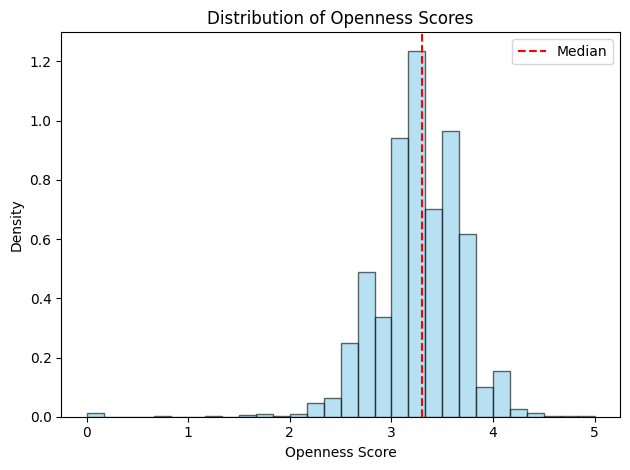

In [92]:
plt.hist(openness_score, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.axvline(median_score, color='red', linestyle='--', label='Median')
plt.title("Distribution of Openness Scores")
plt.xlabel("Openness Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Model Evaluation 
We first train the K-Nearest Neighbors classifier using \( k = 2 \), which performed well in preliminary testing. To assess performance, we generate both a classification report and a confusion matrix, visualized as a heatmap.

The model achieved an overall accuracy of 89%, indicating strong performance on this binary classification task. Precision and recall for both classes are relatively balanced, though we observe a slight asymmetry:

- **Class 0 (Low Openness)** has high precision (0.86) and very high recall (0.97), meaning the model is excellent at correctly identifying low-openness individuals.
- **Class 1 (High Openness)** shows slightly lower recall (0.77), suggesting the model sometimes misclassifies high-openness individuals as low-openness.

Overall, the confusion matrix shows that out of 400 test instances:
- 232 low-openness individuals were correctly identified,
- 124 high-openness individuals were correctly identified,
- Only 7 low-openness individuals were misclassified,
- 37 high-openness individuals were misclassified.

This result demonstrates that the model is effective and balanced enough for our use case.

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       239
           1       0.95      0.77      0.85       161

    accuracy                           0.89       400
   macro avg       0.90      0.87      0.88       400
weighted avg       0.90      0.89      0.89       400



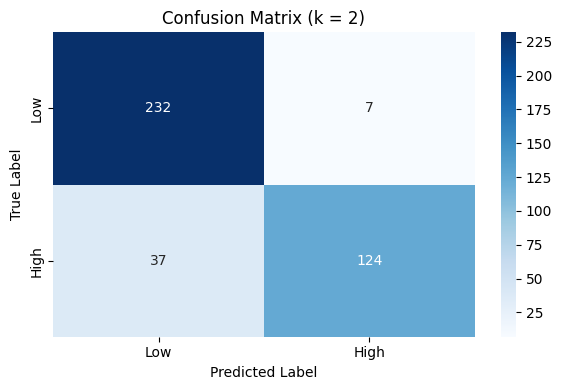

In [102]:
# Train KNN with k=2
k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, preds))

# Plot confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix (k = 2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### Accuracy Across Different k
To understand how the number of neighbors affects performance, we evaluate model accuracy for \( k \) values ranging from 1 to 19.

This analysis helps identify the best-performing value of \( k \) and ensures that our model is not overfitting or underfitting.

k=1, accuracy=0.8925
k=2, accuracy=0.8900
k=3, accuracy=0.8825
k=4, accuracy=0.8850
k=5, accuracy=0.8925
k=6, accuracy=0.8850
k=7, accuracy=0.8900
k=8, accuracy=0.8900
k=9, accuracy=0.8875
k=10, accuracy=0.8900
k=11, accuracy=0.8925
k=12, accuracy=0.8975
k=13, accuracy=0.8950
k=14, accuracy=0.8950
k=15, accuracy=0.9000
k=16, accuracy=0.9050
k=17, accuracy=0.8900
k=18, accuracy=0.8925
k=19, accuracy=0.8925


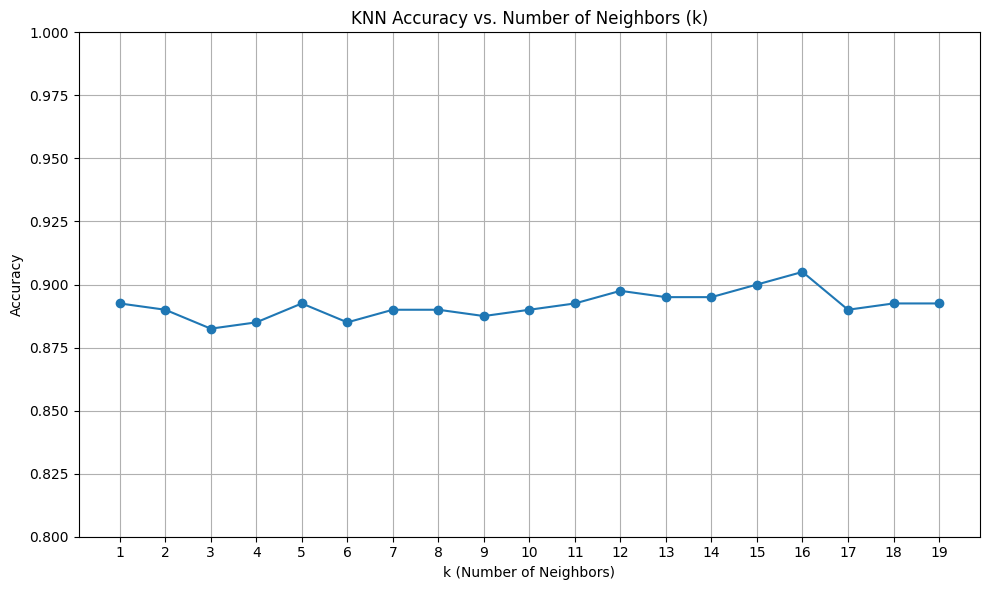

In [107]:
# Evaluate KNN for a range of k values
accuracies = []
k_values = list(range(1, 20))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = np.mean(preds == y_test)
    print(f"k={k}, accuracy={acc:.4f}")
    accuracies.append(acc)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we implemented and evaluated a K-Nearest Neighbors (KNN) classifier to predict whether individuals fall above or below the median on the **Openness to Experience** scale, using responses to 10 survey items.

After standardizing the data and splitting it into training and test sets, we evaluated model performance across values of \( k \) from 1 to 19. The model achieved consistently strong accuracy throughout this range, with the highest accuracy of **90.5% at \( k = 16 \)**.

### Key Findings:
- The model reached **89% accuracy at \( k = 2 \)**, with high precision and recall for both classes.
- The confusion matrix showed that the classifier effectively distinguished between high- and low-openness individuals, with relatively balanced misclassification rates.
- Performance remained stable across most \( k \) values, indicating robustness and low sensitivity to the exact choice of \( k \).

### Real-World Interpretation

This KNN model suggests that openness-related personality traits form meaningful clusters based on self-reported survey responses. In applied settings, KNN could be used in:

- **Personalized recommendation systems** (e.g., job fit or content suggestions based on personality)
- **Educational or psychological assessment tools** that classify individuals into personality-based categories
- **Experimental design** to pre-group participants by personality characteristics

However, practical use would require careful validation, especially since real-world personality data can be noisy, subjective, or imbalanced.

### Limitations

- **Loss of nuance**: Binarizing openness scores around the median may flatten important differences between individuals, especially those near the threshold.
- **Distance metric sensitivity**: KNN depends on Euclidean distance, which assumes all features contribute equally. While standardization helps, irrelevant features or collinearity can still distort results.
- **Computational inefficiency**: KNN stores the entire training set and performs distance calculations at prediction time, making it less scalable than models that learn parameters.
- **No feature selection**: All 10 survey items were treated equally, but not all may contribute equally to the target. Dimensionality reduction or weighting may improve future versions.

---

KNN ultimately proved to be a simple yet powerful tool for classifying openness levels. Its intuitive design and strong baseline performance make it a valuable model in structured psychological datasets — especially when interpretability and low setup cost are priorities.